## Fake Backends
Fake backends allow us to mimmic many of the existing real Quantum systems. But the generic backend allows us to create small and restricted systems and see how those restrictions impact the transpiled code.  

First we will be defining a simple function which will make it easier to test different configurations.

In [1]:
from qiskit import transpile
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit.visualization import plot_gate_map


def define_backend(coupling,basis):
    backend = GenericBackendV2(num_qubits=8, coupling_map=coupling, basis_gates=basis)

    print(f'Coupling: {coupling}')
    print(f'Basis: {basis}')
    
    display(plot_gate_map(backend))
    return backend

Next we are going to create a simple circuit with different types of gates.  
**Note:** Barriers have been added so that it is easier later to find out which fragment corresponds to each gate after transpilations.

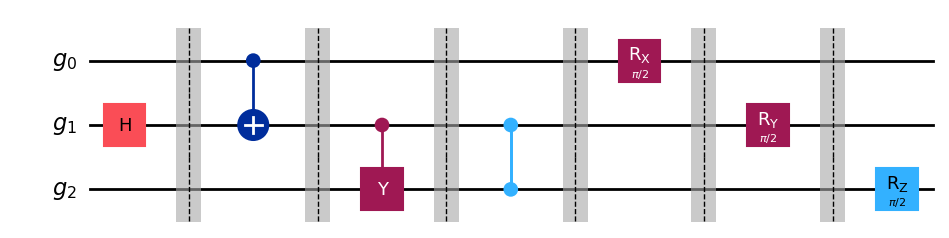

In [2]:
from qiskit import QuantumCircuit,QuantumRegister
import numpy as np 

qr = QuantumRegister(3,name='g')
qc = QuantumCircuit(qr)
qc.h(1)
qc.barrier()
qc.cx(0,1)
qc.barrier()
qc.cy(1,2)
qc.barrier()
qc.cz(1,2)
qc.barrier()
qc.rx(np.pi/2,0)
qc.barrier()
qc.ry(np.pi/2,1)
qc.barrier()
qc.rz(np.pi/2,2)
qc.draw('mpl')

Now we will defining a fake backend, a system with 8 qubits. 
We will also be defining a restricted coupling which only conects each qubit to two other non adjacent ones.
In this first example we will be adding to the basis gates all the gates we need for our circuit.

Coupling: [[0, 3], [1, 4], [2, 5], [3, 6], [4, 7], [5, 0], [6, 1], [7, 2], [3, 0], [4, 1], [5, 2], [6, 3], [7, 4], [0, 5], [1, 6], [2, 7]]
Basis: ['x', 'h', 's', 'z', 'rx', 'ry', 'rz', 'cx', 'cy', 'cz', 'reset', 'delay', 'measure']


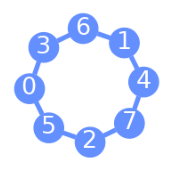

In [3]:
qubits = 8
coupling = (
    [[i,(i+3) % qubits] for i in range(qubits)]+
    [[(i+3) % qubits,i] for i in range(qubits)]
)
basis = ['x','h','s','z','rx','ry','rz','cx','cy','cz']
backend = define_backend(coupling,basis)

Now we transpile the circuit in our backend and display the resulting circuit.

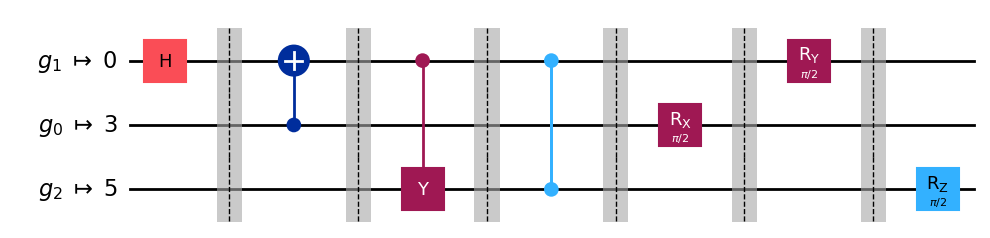

In [4]:
qct = transpile(qc,backend)
qct.draw('mpl')

The circuit has been mapped following the restrictions of the coupling. We see that qubits 0,1,2 have been mapped to physical qubits 0,3,5 (your results may vary).

**Note**: I also have found sometimes the initial Hadamard to be converted into a pair of Ry, Rz gates even though the H gate is included in the basis gates.

We will be now defining a different backend with the same number of qubits, the same coupling but a restricted set of gates.

Coupling: [[0, 3], [1, 4], [2, 5], [3, 6], [4, 7], [5, 0], [6, 1], [7, 2], [3, 0], [4, 1], [5, 2], [6, 3], [7, 4], [0, 5], [1, 6], [2, 7]]
Basis: ['x', 'h', 's', 'z', 'rx', 'cz', 'reset', 'delay', 'measure']


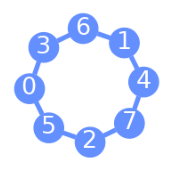

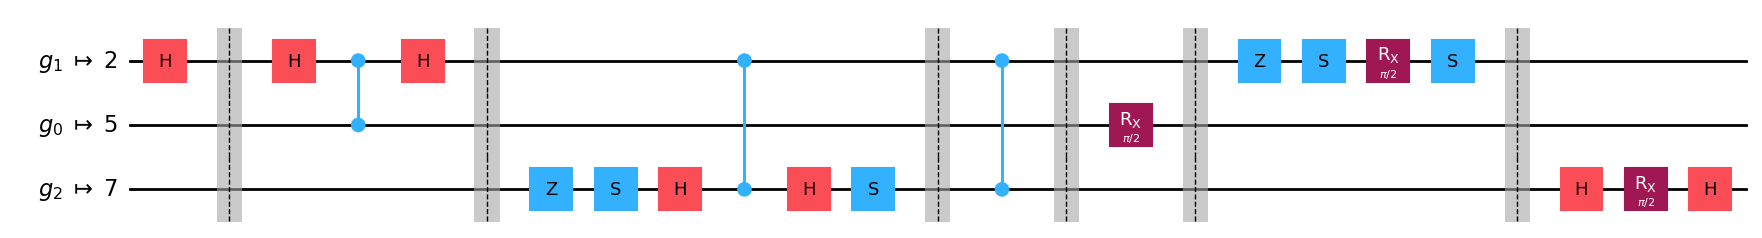

In [5]:
basis = ['x','h','s','z','rx','cz']
backend = define_backend(coupling,basis)

qct = transpile(qc,backend)
qct.draw('mpl')

We can see in the last circuit that all the gates which are still on the basis gates are kept on the circuit while the ones which have been removed have been replace by its equivalents.
One thing is clear, a restricted set of gates means deeper circuits (in this case from 7 to 19) and that means more noise.